### K-Means Clustering over 3 Dimensions
In this exercise, we extend our previous K-means clustering exercise by clustering over a third dimension. We use the Scikit Learn Clustering library to produce centroids for each genre and determine if there exists a natural clustering of genre. The genres we are working with are classical and rock. The attributes we choose to cluster over are energy $X$, danceability $Y$, and acousticness $Z$.

In [42]:
import pandas as pd
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [43]:
# Read data
DATA_BASE_URL = "https://raw.githubusercontent.com/sql-injection/spotify_data/master/"
datasets = {
    "train": DATA_BASE_URL + "train.csv",
    "test": DATA_BASE_URL + "test.csv",
    "all": DATA_BASE_URL + "spotify.csv"
}

total_df = pd.read_csv(datasets["all"])
attribute_names = list(total_df)[:-1]
x = total_df[attribute_names].values
y = total_df["Class"].values

original_x = np.copy(x)
original_y = np.copy(y)

In [44]:
def include_only(x, attribute_names, attribute_subset):
    excluded_columns = [i for i, attribute in enumerate(attribute_names) if attribute not in attribute_subset]
    return np.delete(x, excluded_columns, axis=1)

In [45]:
attribute_subset = ["danceability", "energy", "acousticness"]
print("Attributes we are considering:", attribute_subset)
x = include_only(original_x, attribute_names, attribute_subset)

Attributes we are considering: ['danceability', 'energy', 'acousticness']


In [46]:
feature_a_indices =  np.where(y == "classical")[0]
feature_b_indices = np.where(y == "rock")[0]
feature_a_color = "cornflowerblue";
feature_b_color = "salmon";

attribute_names = np.array(attribute_names)
energy_attribute_index = np.where(attribute_names == "energy")[0][0]
danceability_attribute_index = np.where(attribute_names == "danceability")[0][0]
acousticness_attribute_index = np.where(attribute_names == "acousticness")[0][0]

In [47]:
feature_indices = [*feature_a_indices, *feature_b_indices]

f1 = total_df["energy"].values[feature_indices]
f2 = total_df["danceability"].values[feature_indices]
f3 = total_df["acousticness"].values[feature_indices]

X = np.array(list(zip(f1, f2, f3))).reshape(len(f1), 3)

In [48]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

<Figure size 432x288 with 0 Axes>

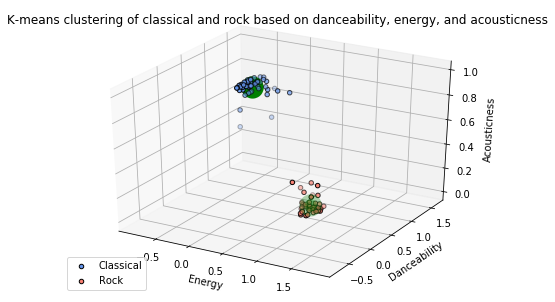

Genre labels were retroactively added after the KMeans learner was fit


In [49]:
step_size = .01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

x_range = np.arange(x_min, x_max, step_size)
y_range = np.arange(y_min, y_max, step_size)
z_range = np.arange(z_min, z_max, step_size)
xx, yy, zz = np.meshgrid(x_range, y_range, z_range)

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("K-means clustering of classical and rock based on danceability, energy, and acousticness")
ax.set_xlabel("Energy")
ax.set_ylabel("Danceability")
ax.set_zlabel("Acousticness")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.scatter(original_x[feature_a_indices, energy_attribute_index],
            original_x[feature_a_indices, danceability_attribute_index],
            original_x[feature_a_indices, acousticness_attribute_index],
            color=feature_a_color, edgecolor='k', label="Classical")
    
ax.scatter(original_x[feature_b_indices, energy_attribute_index],
            original_x[feature_b_indices, danceability_attribute_index],
            original_x[feature_b_indices, acousticness_attribute_index],
            color=feature_b_color, edgecolor='k', label="Rock")

centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
            marker="o", s=150, linewidths=10,
            color="g")

plt.legend(loc="lower left")
plt.show()
print("Genre labels were retroactively added after the KMeans learner was fit")

Based on this three-dimension graph, we see that there is a natural clustering of classical and rock songs along the dimensions of energy, danceability, and acousticness. The centers of the two centroids are represented in green. We expect similar phenomenon to appear when comparing other genres, which may give credence to an unsupervised approach to detecting the genre of songs.